<a href="https://colab.research.google.com/github/betheman/Deep-Learning/blob/master/Tensorflow_Regression_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import seaborn as sns


Instructions for updating:
non-resource variables are not supported in the long term


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/LinearRegression/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [0]:
df=df.drop(['id','date'],axis=1)

In [6]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.corr()['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [0]:
df=df.drop(['condition','zipcode','yr_built','long','sqft_lot15'],axis=1)

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,0,47.5112,1340
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1991,47.7210,1690
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,0,47.7379,2720
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,0,47.5208,1360
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,0,47.6168,1800


In [10]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'lat', 'sqft_living15'],
      dtype='object')

### Focus on price column

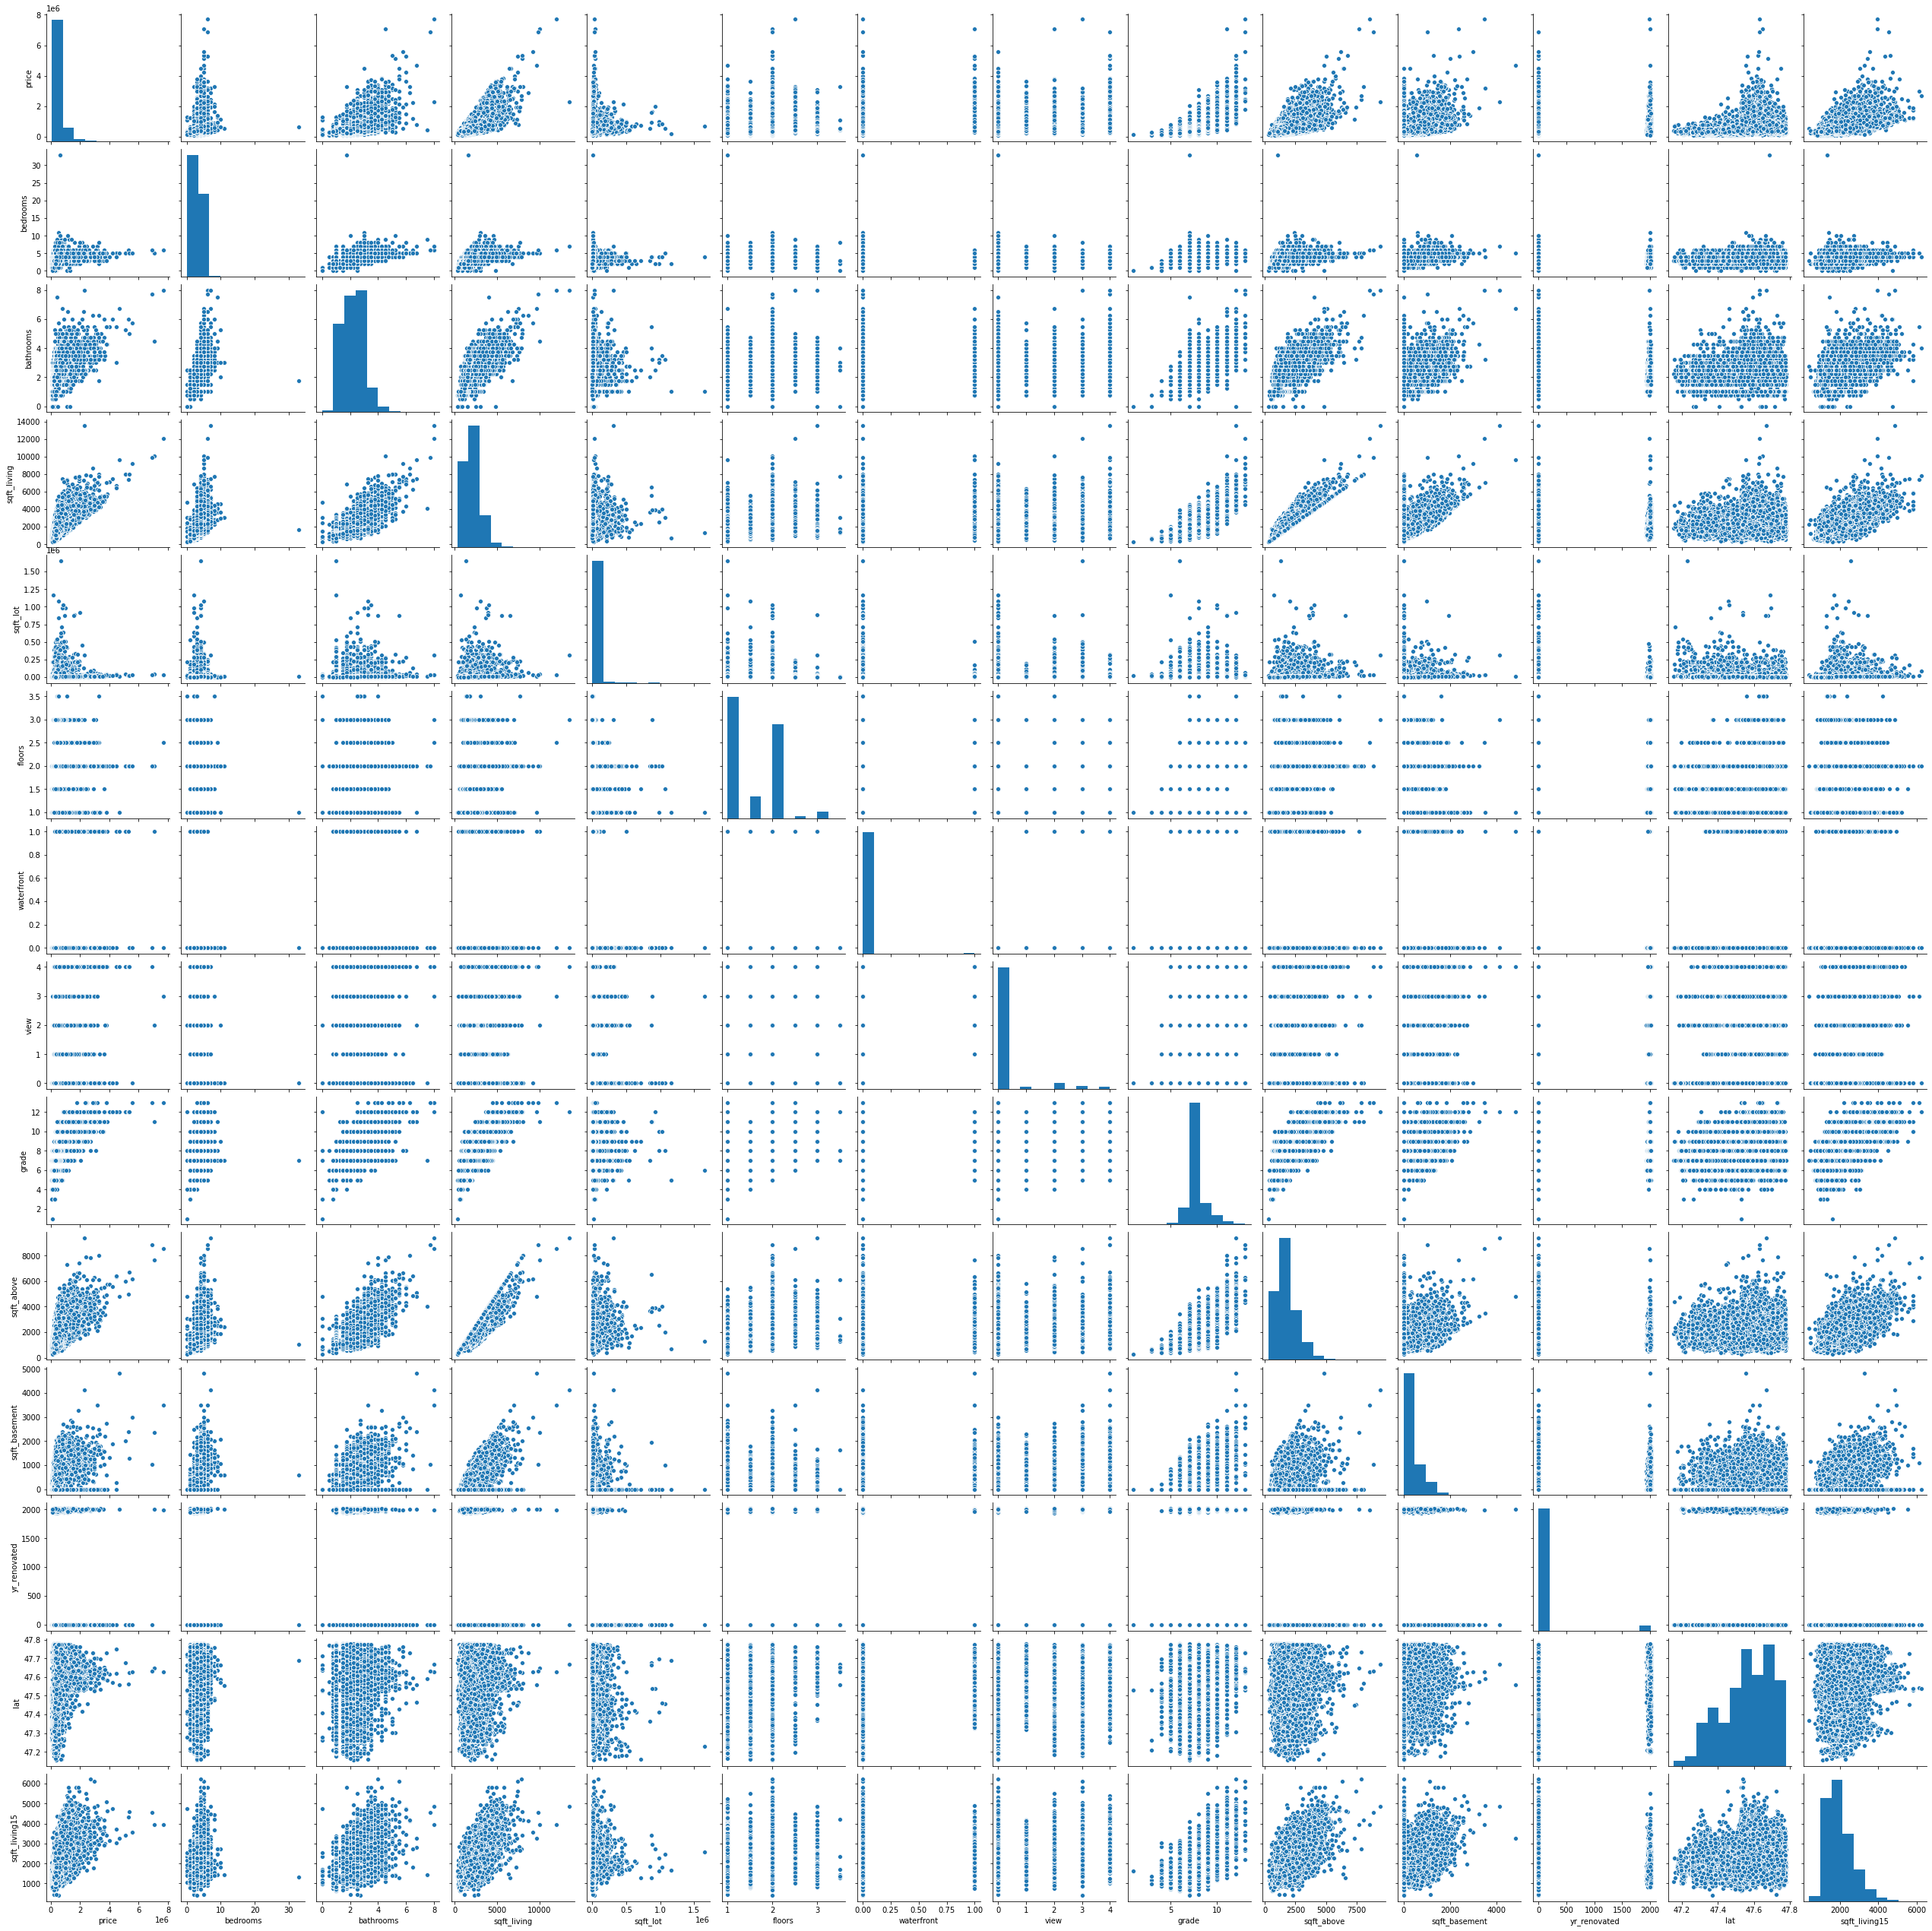

In [11]:
sns.pairplot(df)

### Data Splitting

In [0]:
X=df.drop('price',axis=1)
y=df['price']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Data Normalization

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
ss=StandardScaler().fit(X_train)

In [0]:
X_train=ss.transform(X_train)

In [0]:
X_test=ss.transform(X_test)

In [0]:
ss=StandardScaler().fit(y_train.values.reshape(16209,1))

In [0]:
y_train=ss.transform(y_train.values.reshape(16209,1))

In [0]:
y_test=ss.transform(y_test.values.reshape(len(y_test),1))

In [0]:
y_train=y_train.reshape(1,16209)
y_test=y_test.reshape(1,len(y_test))

In [23]:
y_train

array([[-0.74613629, -0.81175798, -0.93665652, ...,  0.10416459,
        -0.81175798, -0.61747138]])

### ***Linear Regression***

### Random weights and bias

In [0]:
learning_rate=.1
epochs=1000

In [0]:
X = tf.placeholder(tf.float64,(None,None),name='X') 
Y = tf.placeholder(tf.float64,(None),name='Y') 

### Defining cost function and optimizer  here we are using GradientDescentOptimizer

In [0]:

W=tf.Variable(dtype=tf.float64,initial_value=np.random.uniform(1, 4, 13),name='W')
b=tf.Variable(dtype=tf.float64,initial_value=np.random.uniform(1, 4,1)[0],name='b')
predictions=tf.add(tf.reduce_sum(tf.multiply(X,W),axis=1),b)

cost = tf.reduce_mean(tf.square(predictions-Y))
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer() 

In [27]:
loss=[]
with tf.Session() as session:
  session.run(init)
  for i in range(epochs):
        session.run(optimizer, feed_dict = {X : X_train, Y : y_train}) 
        c=session.run(cost, feed_dict = {X : X_train, Y : y_train}) 
        print("Epoch", (i + 1), ": loss =", c) 
        loss.append(c)
	
	# Storing necessary values to be used outside the Session 
  training_cost = session.run(cost, feed_dict ={X: X_train, Y: y_train}) 
  weight = session.run(W) 
  bias = session.run(b) 


Epoch 1 : loss = 21.480621180062748
Epoch 2 : loss = 11.778619174240253
Epoch 3 : loss = 7.196911017995085
Epoch 4 : loss = 4.612634621612
Epoch 5 : loss = 3.104096096878979
Epoch 6 : loss = 2.1936361600061383
Epoch 7 : loss = 1.6258775246184558
Epoch 8 : loss = 1.2605479913331232
Epoch 9 : loss = 1.018390872756684
Epoch 10 : loss = 0.8533282793180723
Epoch 11 : loss = 0.7378157827692656
Epoch 12 : loss = 0.6549476906116269
Epoch 13 : loss = 0.5940901522881763
Epoch 14 : loss = 0.5484012938020252
Epoch 15 : loss = 0.5133861165951865
Epoch 16 : loss = 0.48603348006042746
Epoch 17 : loss = 0.46428888055183165
Epoch 18 : loss = 0.44672566027469995
Epoch 19 : loss = 0.43233611291770435
Epoch 20 : loss = 0.4203965115756902
Epoch 21 : loss = 0.41037854567296383
Epoch 22 : loss = 0.40189036962768804
Epoch 23 : loss = 0.3946368238958287
Epoch 24 : loss = 0.3883922369560726
Epoch 25 : loss = 0.3829815872541491
Epoch 26 : loss = 0.3782672874157436
Epoch 27 : loss = 0.3741397940864841
Epoch 28 : 

### final weights and bias

In [0]:
loss_df=pd.DataFrame(data={'loss':loss})

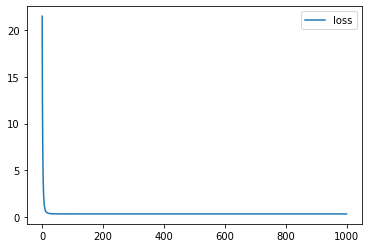

In [29]:
loss_df.plot()

In [30]:
weight

array([-0.06236851, -0.00288891, -0.06389996, -0.01777292, -0.0507011 ,
        0.12987288,  0.14169654,  0.26398041,  0.49947831,  0.25822428,
        0.06978382,  0.2538533 ,  0.00959209])

In [31]:
bias

1.8346862984568324e-15

### Predictions

In [0]:
y_predict=np.add(np.sum(np.multiply(X_test,weight),axis=1),bias)

In [33]:
y_predict

array([-0.29173758,  0.59799328,  1.91693654, ..., -0.40671712,
        1.68661424, -0.34320074])

### Calculating Rsquare

In [0]:
Rsquare=np.sum((y_predict-y_test.mean())**2)/np.sum((y_test-y_test.mean())**2)

In [35]:
Rsquare

0.6380662508696398